**Installing Necessary Libraries**

In [ ]:
pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 4.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357247 sha256=759ef9fdda93d8993a80bce30f832c400df28aec15198cd26a81e8249cd0d9be
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


#Collection & Preprocessing

In [ ]:
import pandas as pd

# Load participants data
participants_file_path = 'participants.csv'
participants_df = pd.read_csv(participants_file_path)


# Define the columns with semicolon-separated values
delimiter_columns = ['course_id','courses_attended', 'mode_of_courses', 'days']

# Function to split the delimited columns and expand the rows
def expand_rows(df, delimiter_columns):
    for col in delimiter_columns:
        df = df.set_index([c for c in df.columns if c not in delimiter_columns]) \
               .apply(lambda x: x.str.split(';').explode() if x.name in delimiter_columns else x).reset_index()
    return df

# Expand the rows
participants_df = expand_rows(participants_df, delimiter_columns)


# Load department data
dept_file_path = 'newdata.csv'
dept_df = pd.read_csv(dept_file_path)

# Display the first few rows of both dataframes
participants_df.head()
participants_df["department"]=participants_df["department"].str.upper()
participants_df["courses_attended"]=participants_df["courses_attended"].str.upper()
dept_df["dept_name"]=dept_df["dept_name"].str.upper()
dept_df["course_name"]=dept_df["course_name"].str.upper()

participants_df.head()

dept_df.head()
gender_mapping = {
    'male': 'Male',
    'male ': 'Male',
    'male': 'Male',
    'female': 'Female',
    'female ': 'Female',
    'frmale': 'Female',
    'female46': 'Female',
    'f': 'Female'
}

# Apply mapping to standardize genders
participants_df['gender'] = participants_df['gender'].str.strip().str.lower().map(gender_mapping).fillna('Unknown')

# Drop rows with unknown genders if needed
participants_df = participants_df[participants_df['gender'] != 'Unknown']

# Check the result
print(participants_df['gender'].value_counts())
participants_df.dropna()

# Check the data types of the 'AGE' column
print(participants_df['AGE'].dtype)

# Convert 'AGE' column to numeric (assuming it's currently string/object)
participants_df['AGE'] = pd.to_numeric(participants_df['AGE'], errors='coerce')  # 'coerce' will turn non-numeric values into NaN

# Apply your lambda function to adjust ages
participants_df['AGE'] = participants_df['AGE'].apply(lambda x: 20 if x < 20 else (70 if x > 70 else x))

# Now 'AGE' column should have adjusted values
participants_df.head()

participants_df=participants_df.astype({"course_id":"int64"})
participants_df.info()

gender
Male      8687
Female    6114
Name: count, dtype: int64
object
<class 'pandas.core.frame.DataFrame'>
Index: 14801 entries, 0 to 14839
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SI.No             14801 non-null  int64  
 1   RegistrationID    14801 non-null  float64
 2   department        14716 non-null  object 
 3   email             14801 non-null  object 
 4   dob               14800 non-null  object 
 5   gender            14801 non-null  object 
 6   role              14799 non-null  object 
 7   designation       14676 non-null  object 
 8   AGE               14800 non-null  float64
 9   course_id         14801 non-null  int64  
 10  courses_attended  14801 non-null  object 
 11  mode_of_courses   14801 non-null  object 
 12  days              14801 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.6+ MB


In [ ]:
participants_df.head()

,SI.No,RegistrationID,department,email,dob,gender,role,designation,AGE,course_id,courses_attended,mode_of_courses,days
0,1,2.212222e+08,COMMERCE,0225nive@gmail.com,02-12-1994,Female,Faculty,Assistant Professor,29.0,87,LEARNING TECHNOLOGIES,Online,5
1,2,2.212254e+08,COMPUTER SCIENCE AND ENGINEERING,10581@ycce.in,03-08-1988,Female,Faculty,Assistant Professor (Sl. Gr),35.0,167,CLOUD COMPUTING,Offline,5
2,3,2.311118e+09,MECHATRONICS,11209h001@kanchiuniv.ac.in,28-12-2002,Male,Student,Student,21.0,444,ARDUINO PROGRAMMING USING TINKERCAD,Online,5
3,4,2.212261e+08,COMPUTER ENGINEERING,115.suku@gmail.com,05-11-1986,Female,Faculty,Lecturer,37.0,195,INDUCTION TRAINING PROGRAMME,Offline,11
4,5,2.212232e+08,MATHEMATICS,123umasaran@gmail.com,10-06-2022,Female,Faculty,Assistant Professor,20.0,94,YOGA AND HEALING TECHNIQUES FOR WELL BEING,Online,5


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
categorical_columns = participants_df.select_dtypes(include=['object']).columns.tolist()
for col in categorical_columns:
  participants_df[col] = le.fit_transform(participants_df[col])
participants_df.head()

,SI.No,RegistrationID,department,email,dob,gender,role,designation,AGE,course_id,courses_attended,mode_of_courses,days
0,1,2.212222e+08,140,0,500,0,0,14,29.0,87,233,2,12
1,2,2.212254e+08,169,1,655,0,0,16,35.0,167,68,1,12
2,3,2.311118e+09,467,2,5861,1,2,186,21.0,444,38,2,12
3,4,2.212261e+08,159,3,1131,0,0,94,37.0,195,187,1,2
4,5,2.212232e+08,447,4,2106,0,0,14,20.0,94,385,2,12


In [ ]:
df=participants_df.corr()
df


,SI.No,RegistrationID,department,email,dob,gender,role,designation,AGE,course_id,courses_attended,mode_of_courses,days
SI.No,1.000000,-0.036352,0.001198,0.971305,0.005745,-0.026226,-0.037908,-0.000179,0.028796,-0.008216,0.003752,-0.019391,-0.013635
RegistrationID,-0.036352,1.000000,-0.018991,-0.037804,0.027737,-0.007591,0.085182,-0.018624,-0.086910,0.661656,-0.018529,0.081903,0.119434
department,0.001198,-0.018991,1.000000,0.002452,-0.006504,0.133224,0.041593,0.073877,0.073400,-0.023932,0.036322,-0.026134,-0.009222
email,0.971305,-0.037804,0.002452,1.000000,0.007220,-0.025379,-0.037307,-0.001830,0.033057,-0.008389,0.002276,-0.016331,-0.013400
dob,0.005745,0.027737,-0.006504,0.007220,1.000000,-0.051192,0.021259,-0.013184,-0.026133,0.017310,0.005849,0.044728,0.025860
gender,-0.026226,-0.007591,0.133224,-0.025379,-0.051192,1.000000,-0.014253,0.064584,0.003579,0.004152,0.037191,-0.101721,-0.030351
role,-0.037908,0.085182,0.041593,-0.037307,0.021259,-0.014253,1.000000,0.471285,-0.322729,0.004655,0.004415,0.144124,0.108096
designation,-0.000179,-0.018624,0.073877,-0.001830,-0.013184,0.064584,0.471285,1.000000,-0.088318,-0.027311,-0.026934,-0.303035,-0.131946
AGE,0.028796,-0.086910,0.073400,0.033057,-0.026133,0.003579,-0.322729,-0.088318,1.000000,-0.031737,-0.006260,-0.078162,0.012452
course_id,-0.008216,0.661656,-0.023932,-0.008389,0.017310,0.004152,0.004655,-0.027311,-0.031737,1.000000,-0.016046,0.029501,0.151483


<Axes: >

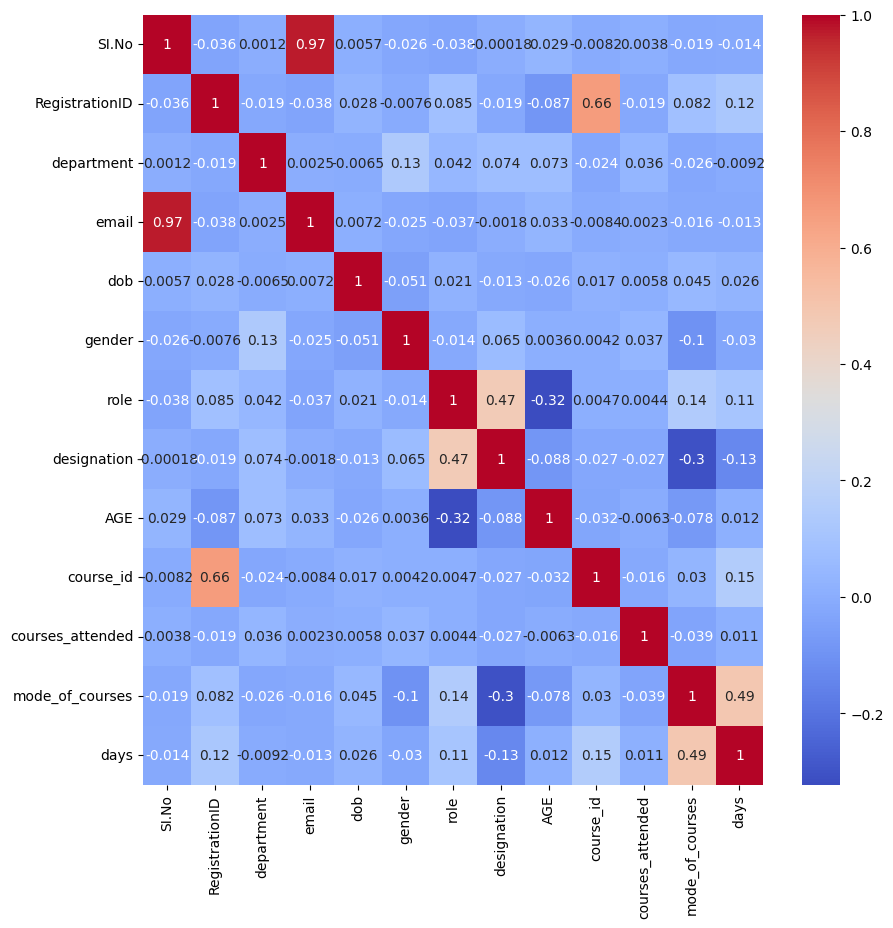

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(df,annot=True,cmap='coolwarm')

#Dividing the Roles

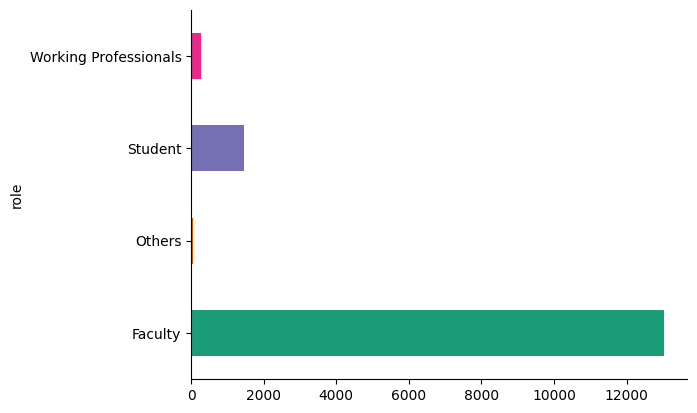

In [ ]:

from matplotlib import pyplot as plt
import seaborn as sns
participants_df.groupby('role').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

#Department Data

In [ ]:
dept_df.head()

,SI.No,Course_id,course_name,dept_name,mode,coordinator_name,coursecategory,course_desc,Days,enrollment
0,1,4,DATA ANALYTICS,COMPUTER SCIENCE AND ENGINEERING,Online,Shanmuganeethi Velu,Silver,Data Analytics is the systematic computational...,5,38
1,2,6,NON TRADITIONAL MACHINING,MECHANICAL ENGINEERING,Online,Somasundaram S,Silver,Non-traditional manufacturing processes is def...,5,27
2,3,7,TRENDS IN CNC MACHINING & METROLOGY,MECHANICAL ENGINEERING,Online,Somasundaram S,Silver,"Over the past 10 years, the computer-aided des...",5,8
3,4,12,DEVELOPING INSTRUCTIONAL MATERIAL,EDUCATIONAL MEDIA AND TECHNOLOGY,Online,Felix Arokiya Raj A.P.,Silver,Many teachers want to take away instruction fr...,5,55
4,5,16,IMPLEMENTATION OF OBE AND NEP-2020,ENGINEERING EDUCATION,Online,Dr Umashanker Sahu,Silver,Outcome-based education is targeted at achievi...,5,34


#Mode of the couses

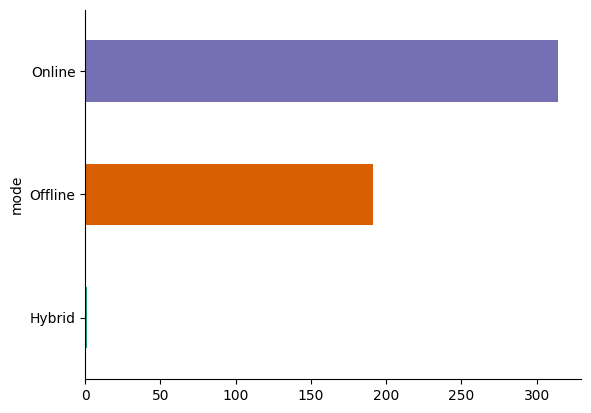

In [ ]:

from matplotlib import pyplot as plt
import seaborn as sns
dept_df.groupby('mode').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Ratings for courses

In [ ]:

if 'ratings' not in participants_df.columns:
    participants_df['ratings'] = 1  # Simple proxy for attendance

# Merging datasets based on the department and course name
merged_df = pd.merge(participants_df, dept_df, left_on=["course_id","department", "courses_attended"], right_on=['Course_id','dept_name', 'course_name'], how='inner')

# Display the merged dataframe
merged_df['ratings'].head()
#merged_df.columns
merged_df.head()
merged_df.drop(["SI.No_x","email","dob","SI.No_y","mode_of_courses","coordinator_name"],axis=1,inplace=True)
merged_df.head()

#


,RegistrationID,department,gender,role,designation,AGE,course_id,courses_attended,days,ratings,Course_id,course_name,dept_name,mode,coursecategory,course_desc,Days,enrollment
0,221225419.0,COMPUTER SCIENCE AND ENGINEERING,Female,Faculty,Assistant Professor (Sl. Gr),35.0,167,CLOUD COMPUTING,5,1,167,CLOUD COMPUTING,COMPUTER SCIENCE AND ENGINEERING,Offline,Silver,Cloud computing is a scalable services consump...,5,31
1,221125297.0,COMPUTER SCIENCE AND ENGINEERING,Male,Faculty,Lecturer,38.0,167,CLOUD COMPUTING,5,1,167,CLOUD COMPUTING,COMPUTER SCIENCE AND ENGINEERING,Offline,Silver,Cloud computing is a scalable services consump...,5,31
2,221125335.0,COMPUTER SCIENCE AND ENGINEERING,Male,Faculty,Lecturer (Sl. Gr),48.0,167,CLOUD COMPUTING,5,1,167,CLOUD COMPUTING,COMPUTER SCIENCE AND ENGINEERING,Offline,Silver,Cloud computing is a scalable services consump...,5,31
3,221225301.0,COMPUTER SCIENCE AND ENGINEERING,Female,Faculty,Lecturer,34.0,167,CLOUD COMPUTING,5,1,167,CLOUD COMPUTING,COMPUTER SCIENCE AND ENGINEERING,Offline,Silver,Cloud computing is a scalable services consump...,5,31
4,221225347.0,COMPUTER SCIENCE AND ENGINEERING,Female,Faculty,Lecturer,37.0,167,CLOUD COMPUTING,5,1,167,CLOUD COMPUTING,COMPUTER SCIENCE AND ENGINEERING,Offline,Silver,Cloud computing is a scalable services consump...,5,31


#Departments vs Courses

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
categorical_columns = merged_df.select_dtypes(include=['object']).columns.tolist()
for col in categorical_columns:
  merged_df[col] = le.fit_transform(merged_df[col])
merged_df.head()

,RegistrationID,department,gender,role,designation,AGE,course_id,courses_attended,days,ratings,Course_id,course_name,dept_name,mode,coursecategory,course_desc,Days,enrollment
0,221225419.0,1,0,0,5,35.0,167,24,4,1,167,24,1,0,2,13,5,31
1,221125297.0,1,1,0,16,38.0,167,24,4,1,167,24,1,0,2,13,5,31
2,221125335.0,1,1,0,19,48.0,167,24,4,1,167,24,1,0,2,13,5,31
3,221225301.0,1,0,0,16,34.0,167,24,4,1,167,24,1,0,2,13,5,31
4,221225347.0,1,0,0,16,37.0,167,24,4,1,167,24,1,0,2,13,5,31


<Axes: >

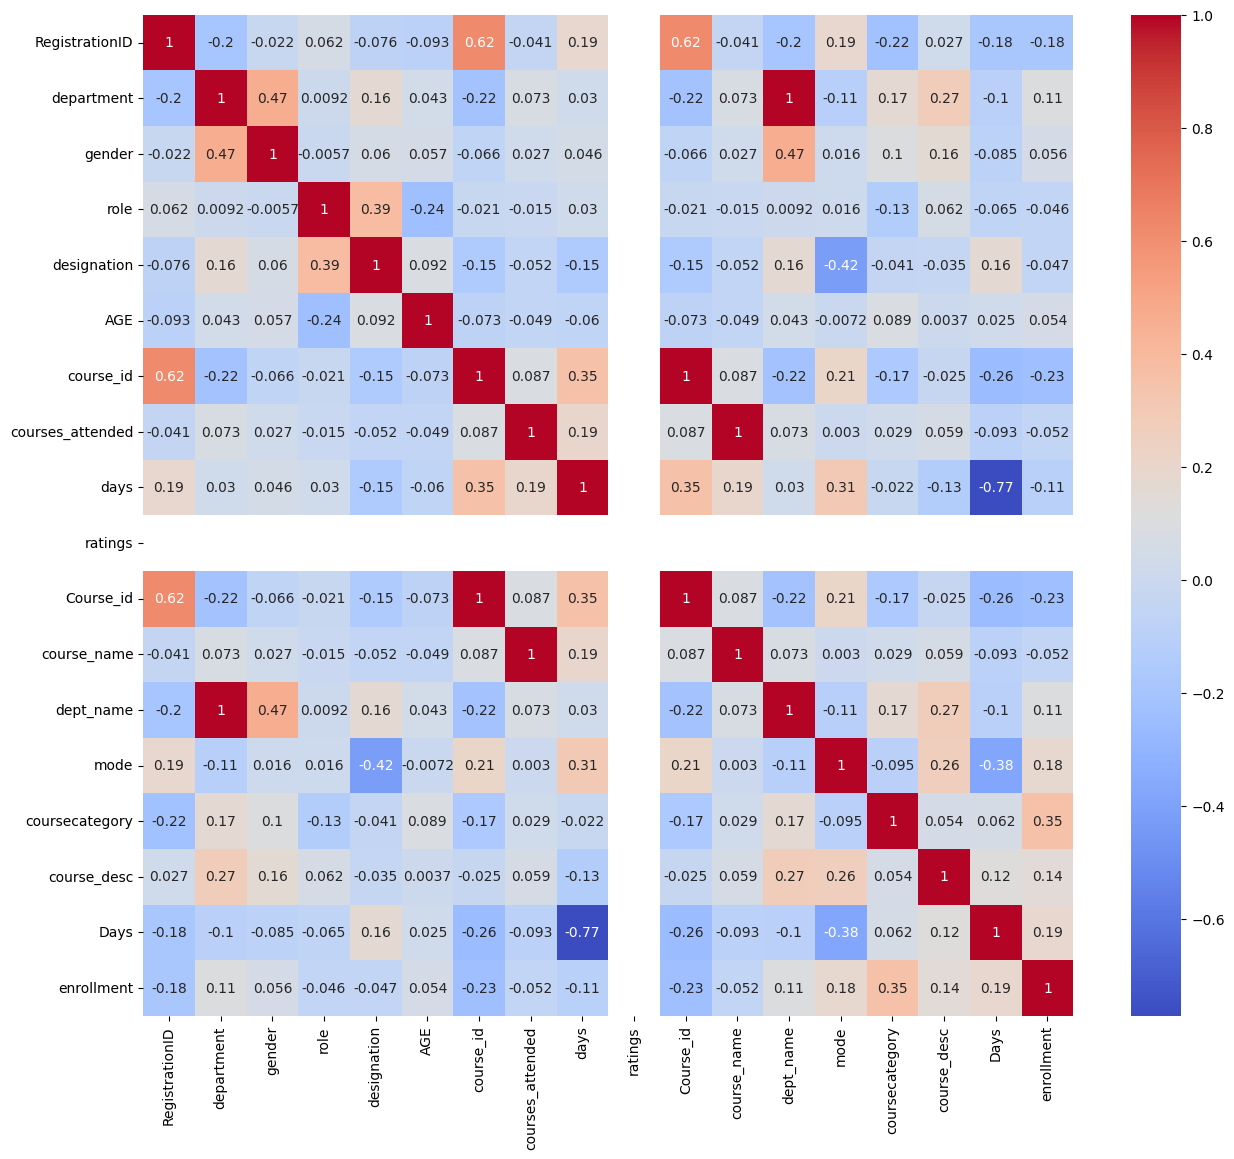

In [ ]:
df=merged_df.corr()
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(15,13))
sns.heatmap(df,annot=True,cmap='coolwarm')

In [ ]:


import pandas as pd

# Group the merged_df by department name
grouped_df = merged_df.groupby('dept_name')

dept_tables = {}

# Iterate through each department and create a table of courses offered
for dept_name, group_df in grouped_df:
    # Create a new DataFrame for the current department
    dept_table = pd.DataFrame({'Course Name': group_df['course_name'].unique()})

    # Add the department name as a column
    #dept_table['Department'] = dept_name

    # Store the table in the dictionary
    dept_tables[dept_name] = dept_table

# Print the tables
for dept_name, dept_table in dept_tables.items():
    print(f"Courses offered by {dept_name}:\n")
    print(dept_table.to_string())
    print("\n\n")


Courses offered by CIVIL AND ENVIRONMENTAL ENGINEERING:

                                                         Course Name
0  MODERN GEOTECHNICAL ENGINEERING AND GROUND IMPROVEMENT TECHNIQUES
1                         GIS APPLICATIONS IN SMART CITY DEVELOPMENT
2                         TRANSPORTATION PLANNING AND GREEN BUILDING
3                                                DISASTER MANAGEMENT



Courses offered by COMPUTER SCIENCE AND ENGINEERING:

                                                        Course Name
0                                                   CLOUD COMPUTING
1           PYTHON PROGRAMMING WITH APPLICATION TO MACHINE LEARNING
2                                              INFORMATION SECURITY
3                                        WEB APPLICATION FRAMEWORKS
4                             CODING SKILLS FOR WOMEN ENTREPRENEURS
5                                           BLOCKCHAIN TECHNOLOGIES
6                                           SOCIAL NETWORK ANALYS

#Model

In [ ]:
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import train_test_split, GridSearchCV
import numpy as np

reader = Reader(rating_scale=(0, 1))
data = Dataset.load_from_df(merged_df[['RegistrationID', 'course_name', 'ratings']], reader)

trainset, testset = train_test_split(data, test_size=0.2)

param_grid = {
    'n_factors': [50, 100, 150],
    'n_epochs': [20, 30, 40],
    'lr_all': [0.002, 0.005, 0.01],
    'reg_all': [0.02, 0.1, 0.4]
}

gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3)
gs.fit(data)

print(f"Best RMSE: {gs.best_score['rmse']}")
print(f"Best parameters: {gs.best_params['rmse']}")

best_algo = gs.best_estimator['rmse']

trainset = data.build_full_trainset()
best_algo.fit(trainset)

def get_top_n_recommendations(user_id, algo, depart, n=5):

    dept_courses = merged_df[merged_df['dept_name'] == depart]['course_name'].unique()

    user_rated_courses = merged_df[(merged_df['RegistrationID'] == user_id) &
                                   (merged_df['dept_name'] == depart)]['course_name'].unique()

    predictions = [algo.predict(user_id, course) for course in dept_courses if course not in user_rated_courses]

    predictions.sort(key=lambda x: x.est, reverse=True)


    top_n_recommendations = [pred.iid for pred in predictions[:n]]

    return top_n_recommendations

# Example usage
user_id = 2412224195
depart = "CIVIL AND ENVIRONMENTAL ENGINEERING"
recommended_courses = get_top_n_recommendations(user_id, best_algo, depart, n=5)

# Print the recommended courses
#print(f"Recommended courses for user {user_id}: {recommended_courses}")

# Map the recommended course IDs back to course names
recommended_course_names = [merged_df[merged_df['course_name'] == course]['course_name'].values[0] for course in recommended_courses]
print(f"Recommended courses for user {user_id}: {recommended_course_names}")

Best RMSE: 0.0048594331935867445
Best parameters: {'n_factors': 50, 'n_epochs': 40, 'lr_all': 0.01, 'reg_all': 0.4}
Recommended courses for user 2412224195: ['GIS APPLICATIONS IN SMART CITY DEVELOPMENT', 'TRANSPORTATION PLANNING AND GREEN BUILDING', 'DISASTER MANAGEMENT']
Recommended courses for user 2412224195: ['GIS APPLICATIONS IN SMART CITY DEVELOPMENT', 'TRANSPORTATION PLANNING AND GREEN BUILDING', 'DISASTER MANAGEMENT']
